In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/elilopez/Desktop/telco_data.csv', error_bad_lines=False)
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),$56.05,...,True,False,3,20200211,$0.00,False,2 Year,No Phone Service,DSL,Internet Only
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,$20.00,...,False,False,3,20200211,$0.00,False,2 Year,One Line,No Internet Service,Phone Only
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),$61.90,...,True,True,2,20200211,$0.00,False,2 Year,Two or More Lines,DSL,Phone+Internet
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,$19.70,...,False,False,3,20200211,$0.00,False,1 Year,One Line,No Internet Service,Phone Only
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,$20.25,...,False,False,2,20200211,$0.00,False,2 Year,One Line,No Internet Service,Phone Only


,count
service_type,
Internet Only,682
Phone Only,1526
Phone+Internet,4835


In [3]:
df.groupby('service_type').tenure.agg(['min', 'mean', 'max'])


,min,mean,max
service_type,,,
Internet Only,0,31.737537,75
Phone Only,0,30.563565,79
Phone+Internet,0,33.026887,75


In [4]:
df.groupby('tenure').count().sort_values(by='churn')


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type
tenure,,,,,,,,,,,,,,,,,,,,,
79,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
76,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
77,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
75,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,171,171,171,171,171,171,171,171,171,171,...,171,171,171,171,171,171,171,171,171,171
71,174,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174
3,204,204,204,204,204,204,204,204,204,204,...,204,204,204,204,204,204,204,204,204,204


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

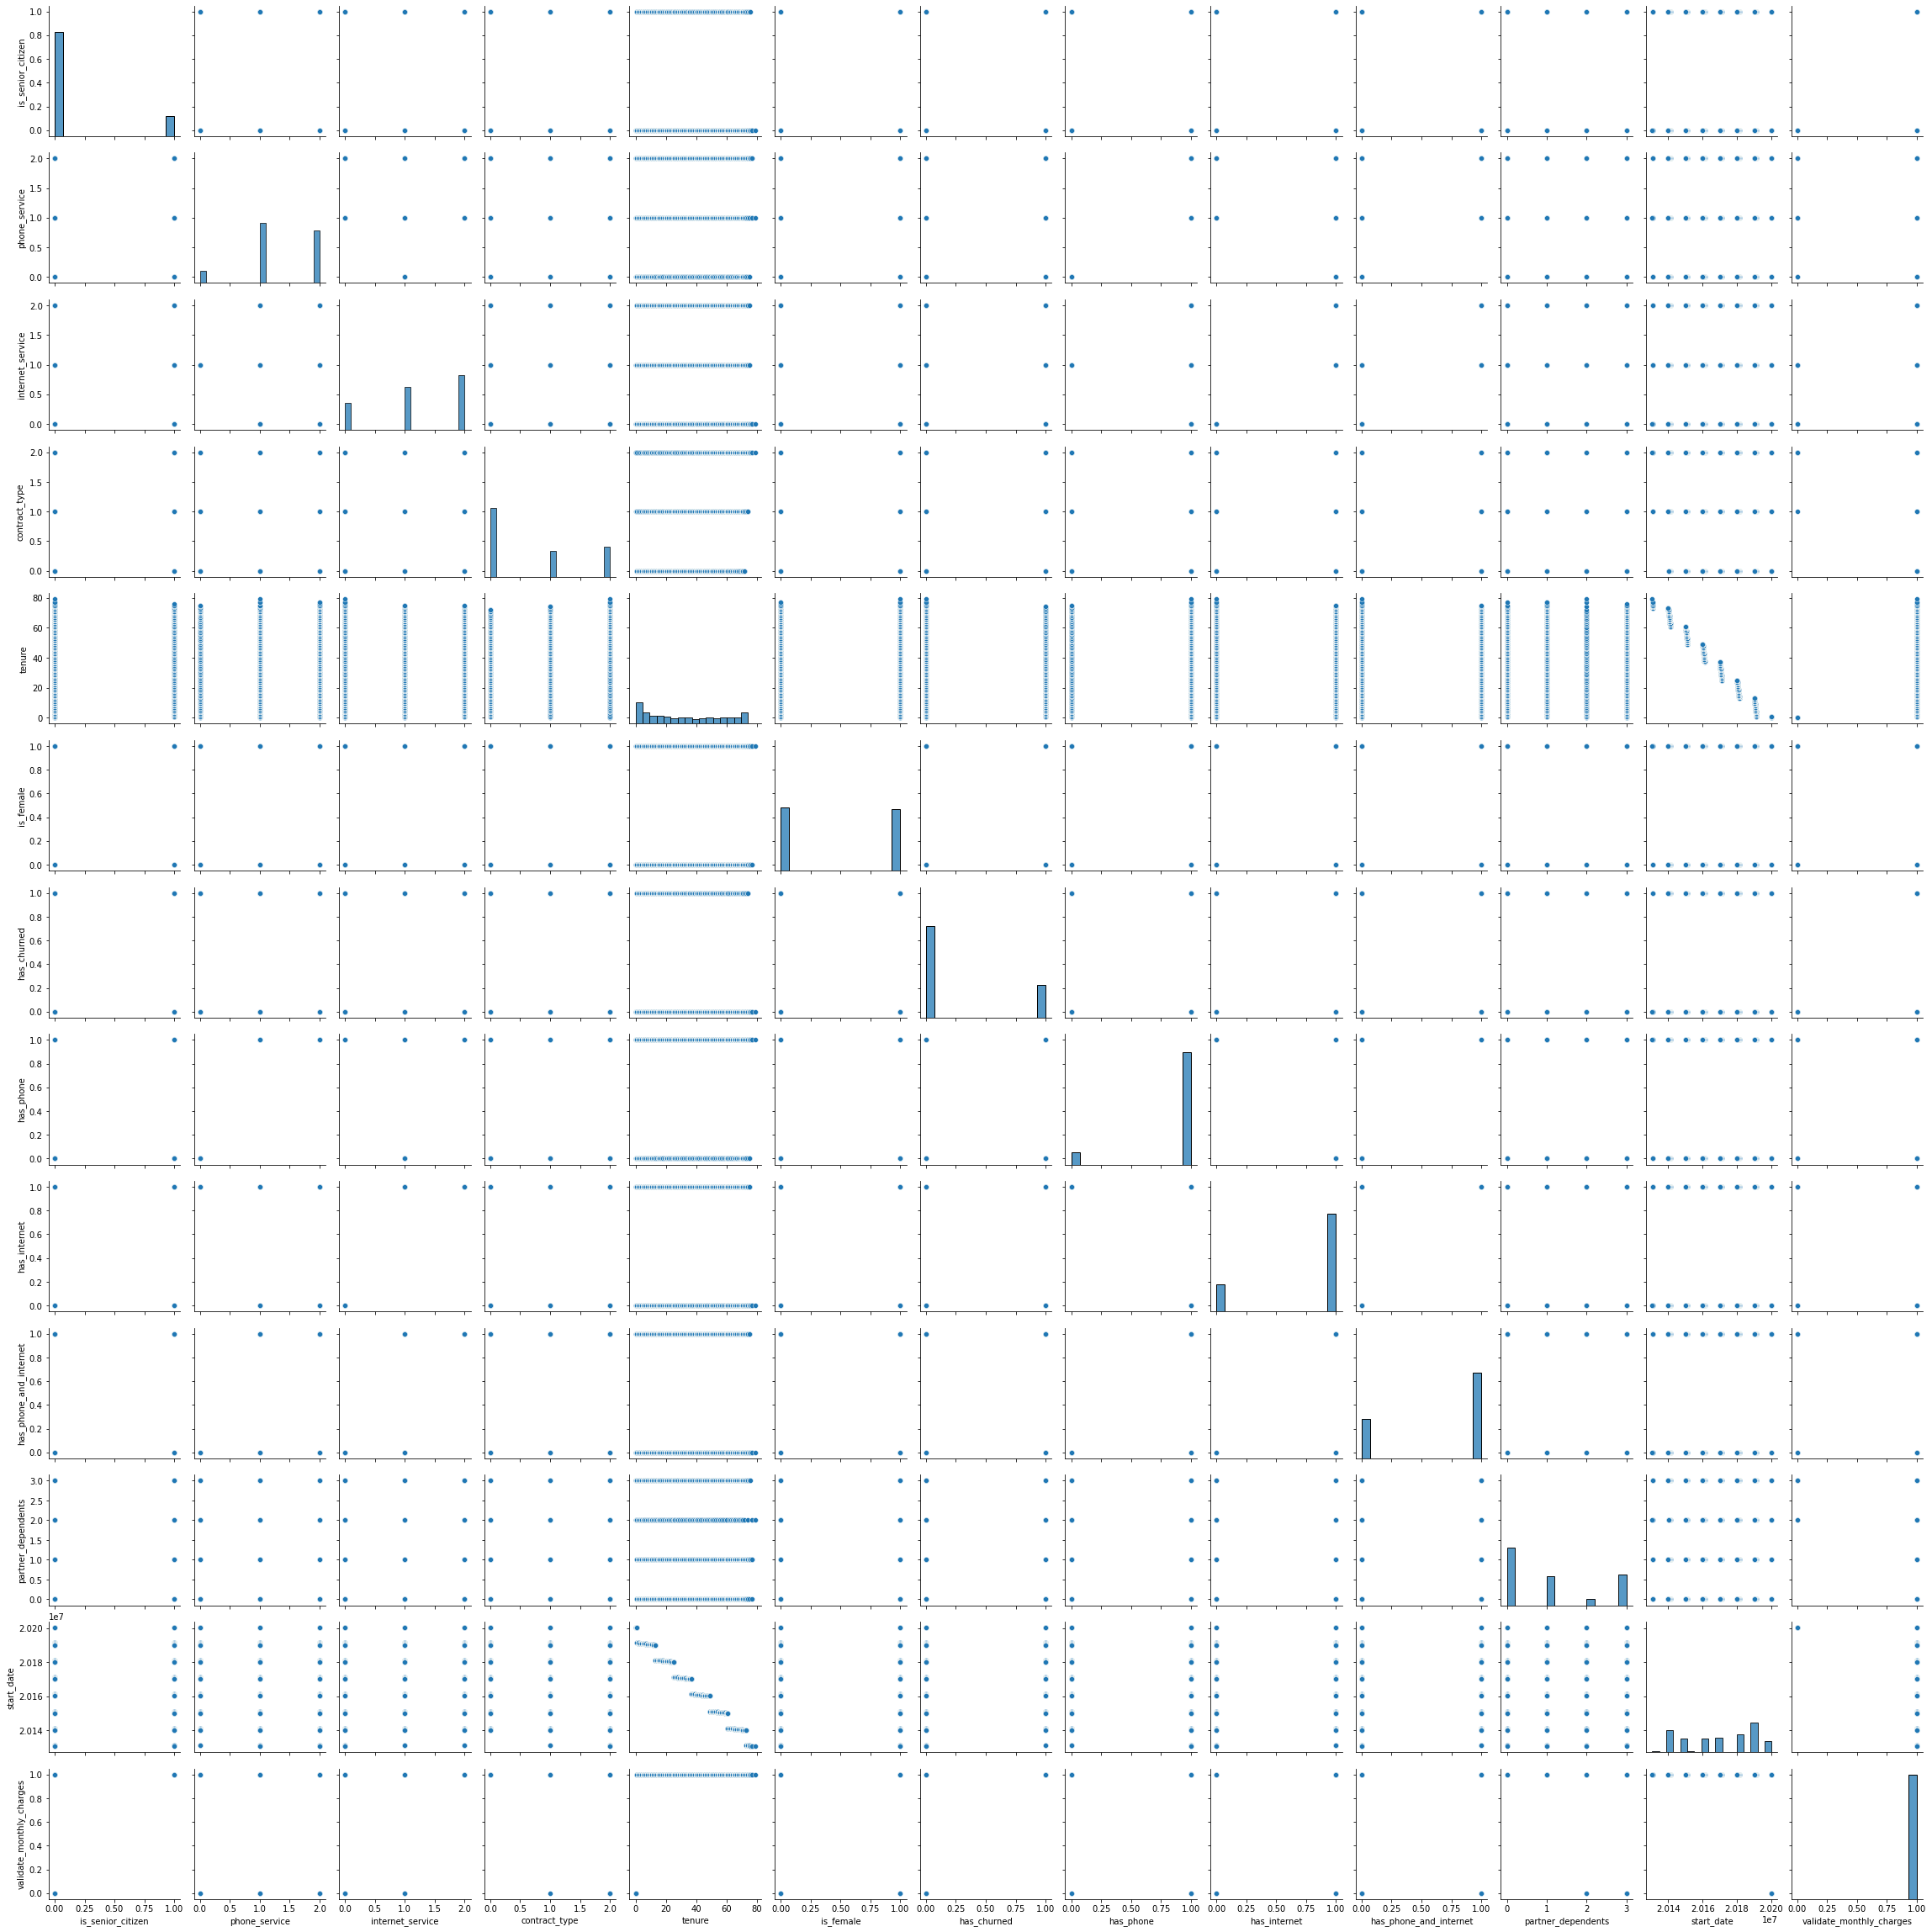

In [5]:
sns.pairplot(df)

In [6]:
df.groupby('churn').tenure.agg(['min', 'mean', 'max'])

,min,mean,max
churn,,,
No,0,37.567646,79
Yes,1,17.974853,74


In [33]:
df.groupby('churn').tenure.agg(['count'])

,count
churn,
No,5174
Yes,1869


In [7]:
df['one_and_a_half_years_or_more'] = df.tenure >= 18
df.one_and_a_half_years_or_more

0       False
1       False
2       False
3       False
4       False
        ...  
7038     True
7039     True
7040     True
7041     True
7042     True
Name: one_and_a_half_years_or_more, Length: 7043, dtype: bool

In [8]:
main_point = df.groupby(['one_and_a_half_years_or_more', 'churn']).customer_id.agg(['count'])
main_point

count
one_and_a_half_years_or_more churn       
False                        No      1455
                             Yes     1196
True                         No      3719
                             Yes      673

In [9]:
main_point['percentage'] = round((main_point['count'] / sum(main_point['count'])), 2)
main_point

count  percentage
one_and_a_half_years_or_more churn                   
False                        No      1455        0.21
                             Yes     1196        0.17
True                         No      3719        0.53
                             Yes      673        0.10

In [10]:
second_point = df.groupby(['one_and_a_half_years_or_more', 'churn', 'service_type']).customer_id.agg(['count'])
second_point['percentage'] = round((second_point['count'] / sum(second_point['count'])), 2)
second_point
# of those that stay over 18 months and do not churn, most have phone+internet.

count  percentage
one_and_a_half_years_or_more churn service_type                     
False                        No    Internet Only     146        0.02
                                   Phone Only        515        0.07
                                   Phone+Internet    794        0.11
                             Yes   Internet Only     117        0.02
                                   Phone Only         99        0.01
                                   Phone+Internet    980        0.14
True                         No    Internet Only     366        0.05
                                   Phone Only        898        0.13
                                   Phone+Internet   2455        0.35
                             Yes   Internet Only      53        0.01
                                   Phone Only         14        0.00
                                   Phone+Internet    606        0.09

In [11]:
fav_customers = df[(df.one_and_a_half_years_or_more == True) & (df.churn == 'No') & (df.service_type == 'Phone+Internet')]
fav_customers

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type,one_and_a_half_years_or_more
2651,0168-XZKBB,Female,0,Yes,No,2,2,0,Electronic check,$86.85,...,True,1,20180812,$86.85,True,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet,True
2652,0480-BIXDE,Female,0,Yes,No,1,2,0,Electronic check,$96.80,...,True,1,20180812,$96.80,True,Month-to-Month,One Line,Fiber Optic,Phone+Internet,True
2653,0557-ASKVU,Female,0,Yes,Yes,1,1,1,Credit card (automatic),$54.40,...,True,3,20180824,$54.40,True,1 Year,One Line,DSL,Phone+Internet,True
2654,0650-BWOZN,Female,1,No,No,1,2,0,Electronic check,$73.55,...,True,0,20180728,$73.55,True,Month-to-Month,One Line,Fiber Optic,Phone+Internet,True
2657,1302-UHBDD,Male,1,No,No,1,2,0,Electronic check,$89.95,...,True,0,20180802,$89.95,True,Month-to-Month,One Line,Fiber Optic,Phone+Internet,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,9866-OCCKE,Female,1,Yes,No,2,2,2,Mailed check,$109.75,...,True,1,20131225,$109.75,True,2 Year,Two or More Lines,Fiber Optic,Phone+Internet,True
7019,0536-ACXIP,Female,0,Yes,No,2,2,2,Electronic check,$109.55,...,True,1,20131126,$109.55,True,2 Year,Two or More Lines,Fiber Optic,Phone+Internet,True
7020,0742-LAFQK,Male,0,Yes,No,2,2,2,Electronic check,$99.15,...,True,1,20131117,$99.15,True,2 Year,Two or More Lines,Fiber Optic,Phone+Internet,True
7026,5248-RPYWW,Female,1,Yes,Yes,2,1,2,Bank transfer (automatic),$90.15,...,True,3,20131127,$90.15,True,2 Year,Two or More Lines,DSL,Phone+Internet,True


In [12]:
(fav_customers.gender == 'Male').mean()
# 50/50

0.5030549898167006

In [13]:
fav_customers.is_senior_citizen.mean()
# most are not senior citizens

0.180040733197556

In [14]:
(fav_customers.partner == 'Yes').mean()
# most do have a partner

0.6281059063136456

In [15]:
(fav_customers.dependents == 'Yes').mean()
# most do not have dependants

0.32871690427698574

In [16]:
fav_customers.groupby('contract_type_desc').customer_id.agg(['count'])
# no real distinction between contract type besides a small decline in 1 year contracts

,count
contract_type_desc,
1 Year,770
2 Year,842
Month-to-Month,843


In [31]:
y_value = df.groupby('tenure').count()
y_value

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type,one_and_a_half_years_or_more
tenure,,,,,,,,,,,,,,,,,,,,,
0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
1,617,617,617,617,617,617,617,617,617,617,...,617,617,617,617,617,617,617,617,617,617
2,232,232,232,232,232,232,232,232,232,232,...,232,232,232,232,232,232,232,232,232,232
3,204,204,204,204,204,204,204,204,204,204,...,204,204,204,204,204,204,204,204,204,204
4,171,171,171,171,171,171,171,171,171,171,...,171,171,171,171,171,171,171,171,171,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
75,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
76,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


<function matplotlib.pyplot.show(close=None, block=None)>

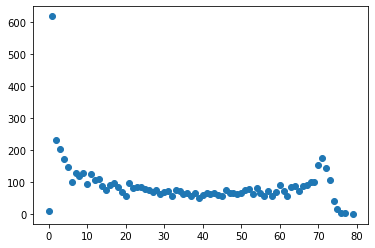

In [29]:
plt.scatter(df.tenure.unique(), y_value.customer_id)
plt.show
# As tenure increases, there doesn't seem to be an increase in count. 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79])

tenure
0      11
1     617
2     232
3     204
4     171
     ... 
74     41
75     15
76      3
77      5
79      1
Name: service_type, Length: 79, dtype: int64